# Using Gradient Descent for multi-classification issues.

In [1]:
import numpy as np
import pandas as pd



In [2]:
!pip install tensorflow

     |████████████████████████████████| 120.8MB 16.6MB/s eta 0:00:01     |████████████████████████████▍   | 107.2MB 13.2MB/s eta 0:00:02
     |████████████████████████████████| 61kB 8.0MB/s eta 0:00:011
     |████████████████████████████████| 112kB 16.4MB/s eta 0:00:01
     |████████████████████████████████| 28.4MB 16.4MB/s eta 0:00:01
     |████████████████████████████████| 51kB 8.5MB/s  eta 0:00:01
     |████████████████████████████████| 51kB 9.6MB/s  eta 0:00:01
     |████████████████████████████████| 2.3MB 16.6MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 15.7MB/s eta 0:00:01
     |████████████████████████████████| 450kB 7.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 9.7MB/s  eta 0:00:01
     |████████████████████████████████| 3.8MB 14.0MB/s eta 0:00:01
     |████████████████████████████████| 81kB 9.5MB/s  eta 0:00:01
     |████████████████████████████████| 92kB 13.2MB/s eta 0:00:01
     |████████████████████████████████| 163kB 12.4MB/s eta 0:00:0

     |████████████████████████████████| 153kB 14.1MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=686524fc2bd95bdb47c6235e6b2d9f49bdcad9d12df1724b84d2a267b878611a
  Stored in directory: /Users/jongwoop/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121932 sha256=878e0b13d01601d215438b1ad19bec9f309ddc6789c7b264cb34ee946cf151c4
  Stored in directory: /Users/jongwoop/Library/Caches/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=8a109c7718bace2e547754a94fe663955a9d3f951f558a253ccd9497591cbcbf
  Stored in directory: /Users/jongwoop/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-cp37-none-any.whl size=61682 sha256=c9d2b65c

In [3]:
!pip install keras

     |████████████████████████████████| 378kB 571kB/s eta 0:00:01


## Load MNIST Data

In [25]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

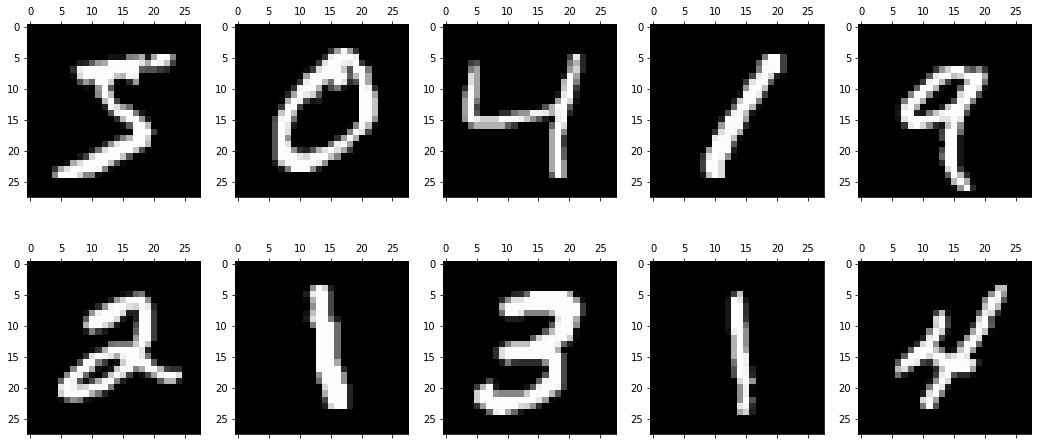

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()
print(y_train[0:10])

figures, axes = plt.subplots(nrows = 2, ncols = 5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

In [30]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [53]:
from keras.utils import to_categorical

y_train_hot = np.eye(10)[y_train]
y_test_hot = np.eye(10)[y_test]

print(y_train_hot.shape, y_test_hot.shape)
print(y_train[0:10] ,'\n', y_train_hot[0:10])

(60000, 10) (10000, 10)
[5 0 4 1 9 2 1 3 1 4] 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Define Sigmoid

In [54]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

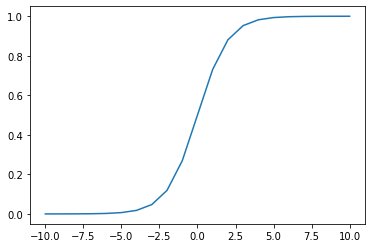

In [56]:
xx = np.linspace(-10, 10, num = 21)
yy = sigmoid(xx)

plt.plot(xx, yy)

## Define Cross-Entropy

In [58]:
def cross_entropy(actual, predict, eps = 1e-15):
    actual = np.array(actual)
    predict = np.array(predict)
    
    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)
    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

## Gradient Descent

In [152]:
num_epoch = 200
learning_rate = 0.1

num_data = X_train.shape[0]

w = np.random.uniform(low = -1.0, high = 1.0, size = (10, 784 ))  # Feature 784, Label 10
b = np.random.uniform(low = -1.0, high = 1.0, size = (10, 1))

for epoch in range(num_epoch):
    y_predict_hot = np.dot(w, X_train.T) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = np.argmax(y_predict_hot, axis = 0)
    accuracy = (y_predict == y_train).mean()
    
    if accuracy > 0.8 : break
    if epoch % 10 == 0:
        print(f"{epoch}, accuracy = {accuracy}")
    
    w = w - learning_rate * np.dot((y_predict_hot - y_train_hot.T), X_train) / num_data
    b = b - learning_rate * (y_predict_hot - y_train_hot.T).mean(axis = 1, keepdims = True)

print("----" * 4)
print(f"{epoch}, accuracy = {accuracy}")

0, accuracy = 0.17516666666666666
10, accuracy = 0.62775
----------------
20, accuracy = 0.8062833333333334


In [153]:
y_predict_hot = np.dot(w, X_train.T) + b
y_predict_hot = sigmoid(y_predict_hot)

y_predict = np.argmax(y_predict_hot, axis = 0)

train_result = pd.DataFrame({"actual":y_train, 'predict': y_predict})
train_accuracy = (train_result.actual == train_result.predict).mean()

print("Accuracy(train)= {0:.5f}".format(train_accuracy))
print(train_result.shape)

train_result.head(10)

Accuracy(train)= 0.80628
(60000, 2)


,actual,predict
0,5,3
1,0,0
2,4,4
3,1,1
4,9,4
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


## Test

In [154]:
y_predict_hot = np.dot(w, X_test.T) + b
y_predict_hot = sigmoid(y_predict_hot)

y_predict = np.argmax(y_predict_hot, axis = 0)

test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})
test_accuracy = (test_result.actual == test_result.predict).mean()

print('Accuracy(test) = {0:.5f}'.format(test_accuracy))
print(test_result.shape)

test_result.head(10)

Accuracy(test) = 0.81170
(10000, 2)


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,0
9,9,9
